In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'covid_19_clean_complete.csv'
df = pd.read_csv(filename)

In [3]:
parse_dates = ['Date']

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')



### Detalhes da Coluna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42543 entries, 0 to 42542
Data columns (total 10 columns):
Province/State    12714 non-null object
Country/Region    42543 non-null object
Lat               42543 non-null float64
Long              42543 non-null float64
Date              42543 non-null object
Confirmed         42543 non-null int64
Deaths            42543 non-null int64
Recovered         42543 non-null int64
Active            42543 non-null int64
WHO Region        42543 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 3.2+ MB


In [7]:
df.describe(include = 'object')

,Province/State,Country/Region,Date,WHO Region
count,12714,42543,42543,42543
unique,78,187,163,6
top,Bermuda,China,2020-04-25,Europe
freq,163,5379,261,13040





### Data dos Dados

### 22/01/2020 - 02/07/2020

In [8]:
a = df.Date.value_counts().sort_index()
print('Primeira Data:',a.index[0])
print('Última Data:',a.index[-1])

Primeira Data: 2020-01-22
Última Data: 2020-07-02


In [9]:
df.isnull().sum()

Province/State    29829
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64





### Renomeando as Colunas

In [10]:
df.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# Casos Ativos = Confirmados - Mortes - Recuperados
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']








# Casos Confirmados ao Longo do Tempo

[Text(0, 0.5, 'Total de casos'), Text(0.5, 0, 'Datas')]

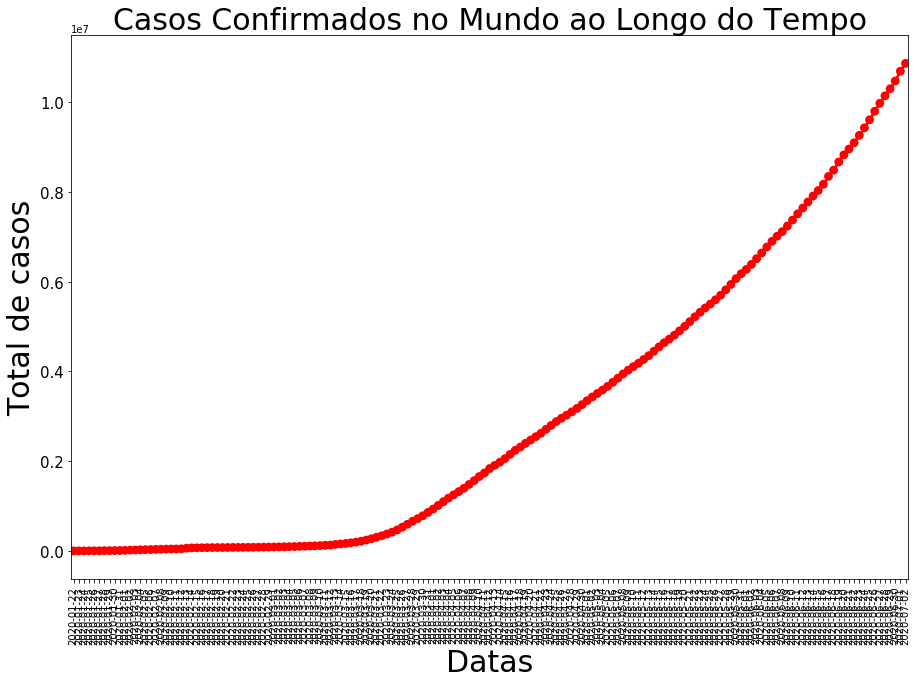

In [11]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Datas",fontsize = 30)
plt.ylabel('Total de casos',fontsize = 30)
plt.title("Casos Confirmados no Mundo ao Longo do Tempo" , fontsize = 30)
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.date ,y = total_cases.confirmed , color = 'r')
ax.set(xlabel='Datas', ylabel='Total de casos')







# 20 Países com mais Casos

In [12]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,country,confirmed
0,US,2739879
1,Brazil,1496858
2,Russia,660231
3,India,625544
4,Peru,292004
5,United Kingdom,285268
6,Chile,284541
7,Spain,250103
8,Italy,240961
9,Mexico,238511


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

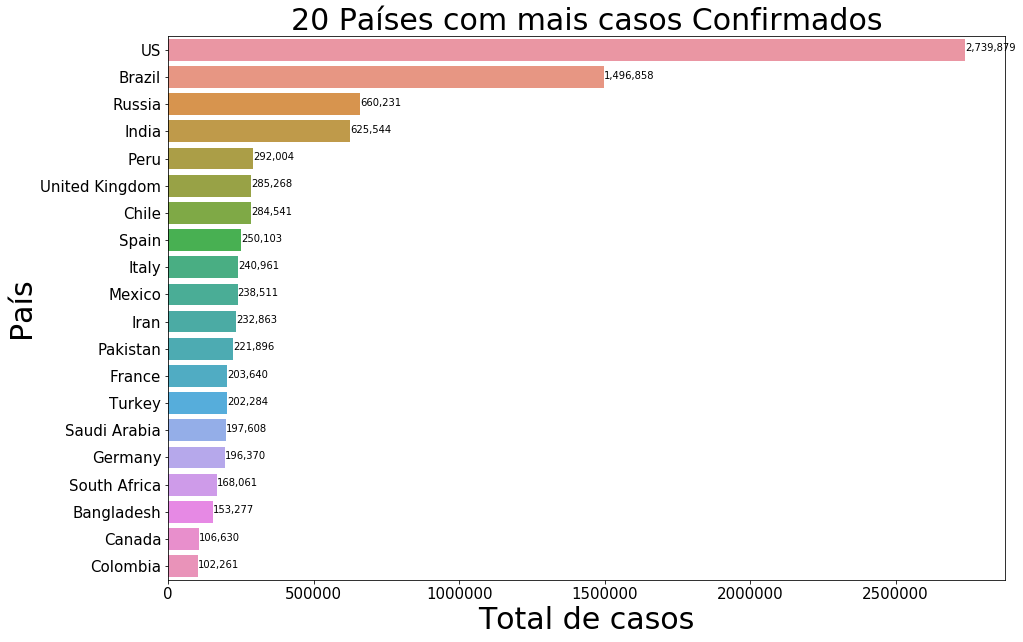

In [13]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("20 Países com mais casos Confirmados" , fontsize = 30)
ax = sns.barplot(x = top_casualities.confirmed, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.confirmed,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')






# 20 Países com mais Casos Ativos

In [14]:
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

,country,active
0,US,1829169
1,Brazil,477282
2,United Kingdom,239815
3,India,227439
4,Russia,222287
5,Pakistan,103722
6,Peru,99862
7,Canada,97931
8,France,96835
9,Bangladesh,84909


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

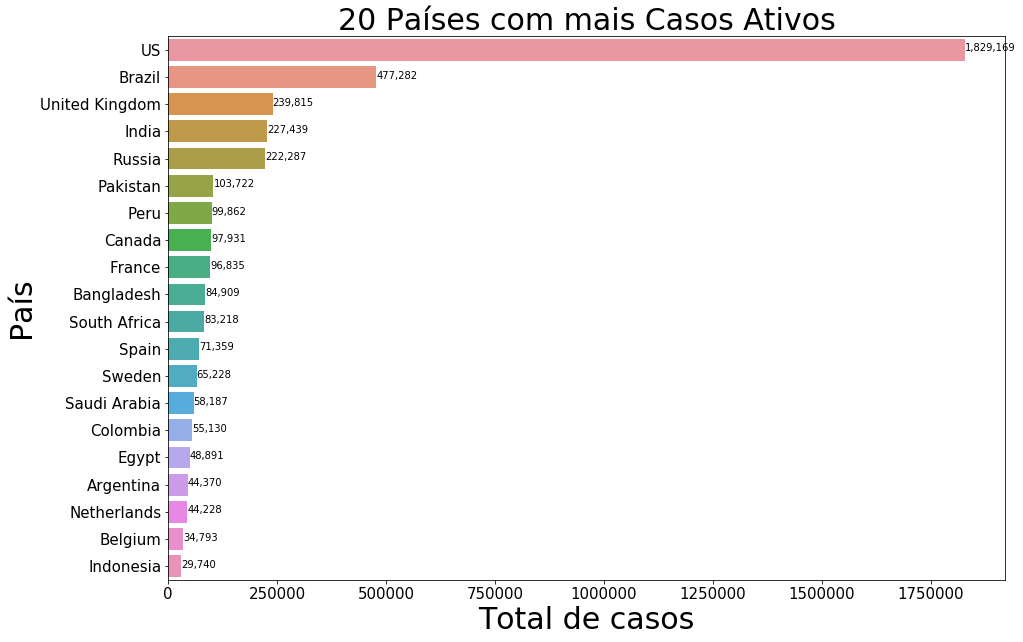

In [16]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("20 Países com mais Casos Ativos" , fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')








# 20 Países com mais Mortes

In [17]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,country,deaths
0,US,128740
1,Brazil,61884
2,United Kingdom,44080
3,Italy,34818
4,France,29878
5,Mexico,29189
6,Spain,28368
7,India,18213
8,Iran,11106
9,Peru,10045


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

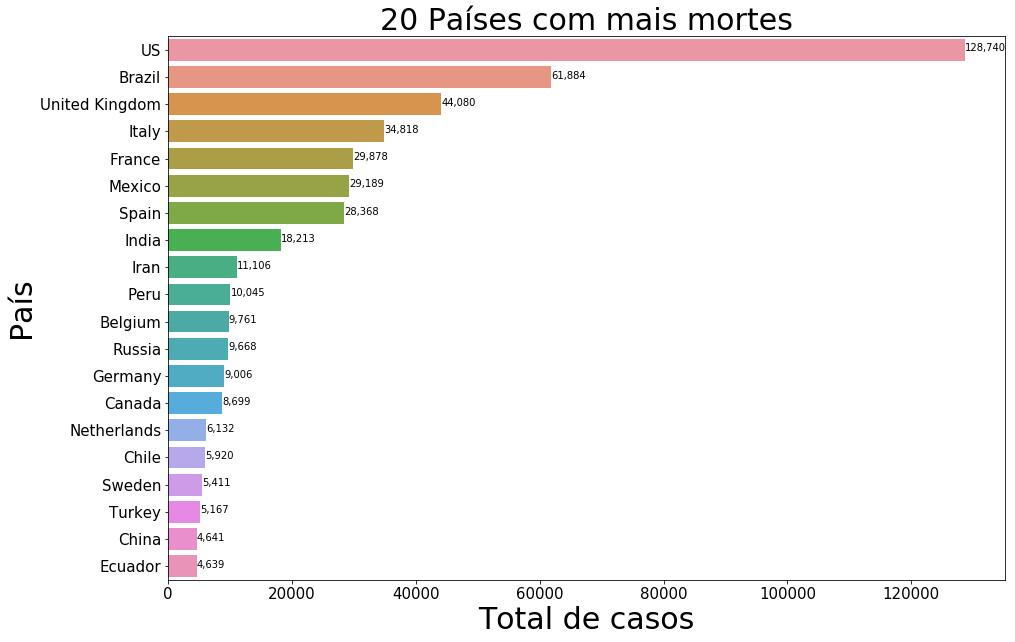

In [18]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("20 Países com mais mortes" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')







# 20 Países com mais Recuperados

In [19]:
top_recovered = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,country,recovered
0,Brazil,957692
1,US,781970
2,Russia,428276
3,India,379892
4,Chile,249247
5,Iran,194098
6,Italy,191083
7,Mexico,183757
8,Peru,182097
9,Germany,179800


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

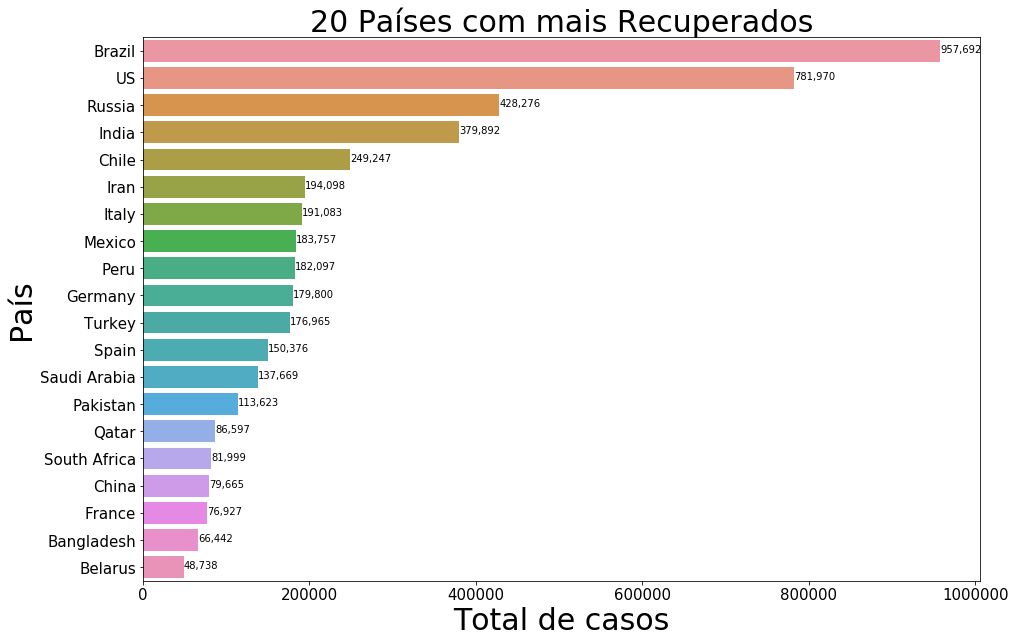

In [20]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("20 Países com mais Recuperados" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')








# 20 Países com a pior Mortalidade e melhor Taxa de Recuperação

In [21]:
rate = top.groupby(by = 'country')['recovered','confirmed','deaths'].sum().reset_index()
rate['recovery percentage'] =  round(((rate['recovered']) / (rate['confirmed'])) * 100 , 2)
rate['death percentage'] =  round(((rate['deaths']) / (rate['confirmed'])) * 100 , 2)
rate.head()

,country,recovered,confirmed,deaths,recovery percentage,death percentage
0,Afghanistan,16041,32022,807,50.09,2.52
1,Albania,1559,2662,69,58.56,2.59
2,Algeria,10342,14657,928,70.56,6.33
3,Andorra,800,855,52,93.57,6.08
4,Angola,97,315,17,30.79,5.40


In [23]:
mortality = rate.groupby(by = 'country')['death percentage'].sum().sort_values(ascending = False).head(20).reset_index()
mortality

,country,death percentage
0,Yemen,26.62
1,Belgium,15.85
2,United Kingdom,15.45
3,France,14.67
4,Italy,14.45
5,Hungary,14.09
6,Mexico,12.24
7,Netherlands,12.13
8,Spain,11.34
9,Bahamas,10.58


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Taxa de Mortalidade por Porcentagem')]

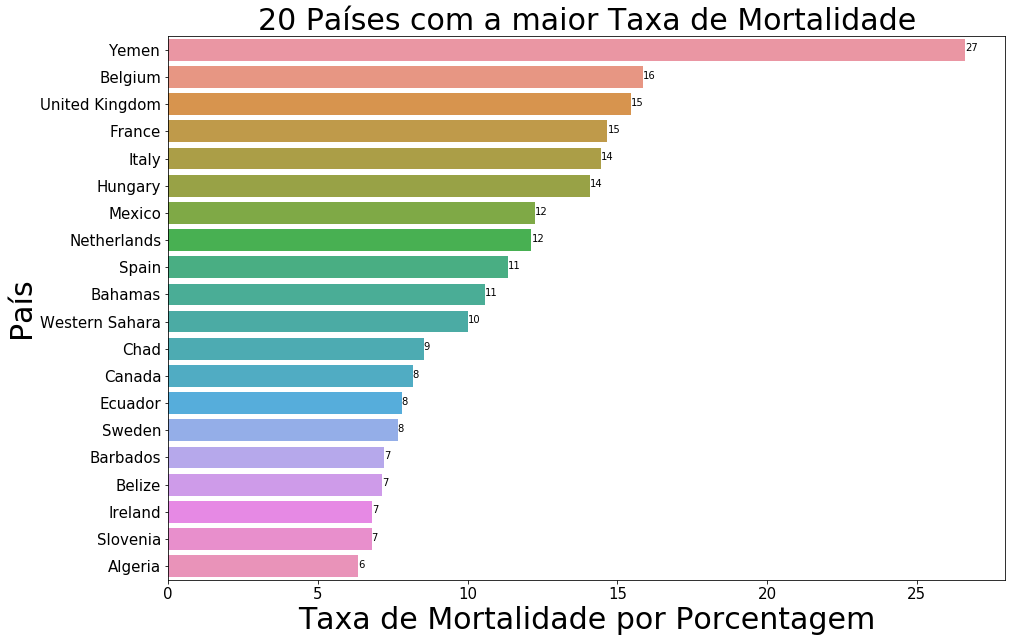

In [24]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("20 Países com a maior Taxa de Mortalidade" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Taxa de Mortalidade por Porcentagem', ylabel='País')

In [25]:
recovery = rate.groupby(by = 'country')['recovery percentage'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

,country,recovery percentage
0,Dominica,100.00
1,Greenland,100.00
2,Fiji,100.00
3,Laos,100.00
4,Grenada,100.00
5,Saint Vincent and the Grenadines,100.00
6,Saint Lucia,100.00
7,Holy See,100.00
8,Saint Kitts and Nevis,100.00
9,Iceland,98.81


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Taxa de Recuperação por Porcentagem')]

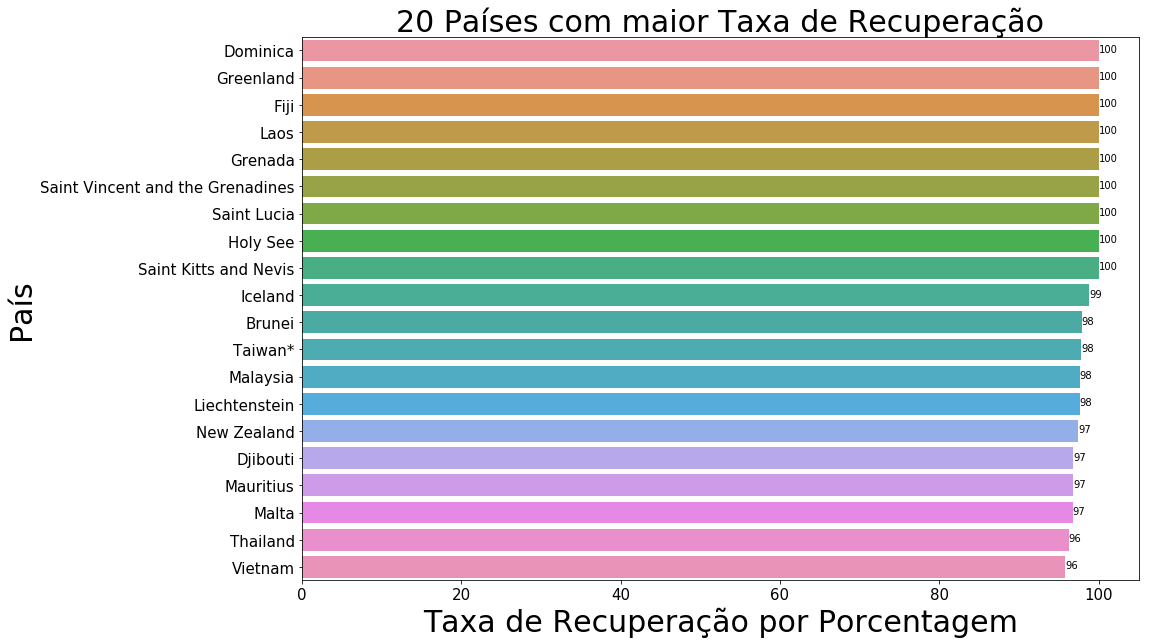

In [26]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("20 Países com maior Taxa de Recuperação" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Taxa de Recuperação por Porcentagem', ylabel='País')